<a href="https://colab.research.google.com/github/perezrmaria/intonation_analysis/blob/main/intonation_heatmaps_short%26long_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Following the score, only vibrato in long notes

In [8]:
%pip install pretty_midi

In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
import pretty_midi
from tqdm import tqdm
import statistics
import random

import librosa

import scipy
import scipy.signal as signal
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
from matplotlib.colors import LinearSegmentedColormap

from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/Shareddrives/Master Thesis')
import midi_functions
import peak_functions
import freqvibrato_functions
import dict_functions


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
main_folder = '/content/drive/Shareddrives/Master Thesis/iter1_midi/wohlfahrt_first_30_no_accidentals'

short_info_method_general, short_time_method_general, long_final_notes, long_final_times, len_every_mid = midi_functions.create_dic_all_method(main_folder) #no duration needed

100%|██████████| 8/8 [00:43<00:00,  5.47s/it]


## For short notes

In [11]:
pshort_main_pitch_value, pshort_stabilized_values, pshort_stabilized_time, pshort_coverage_dict = dict_functions.get_mean_pitch_value(short_info_method_general, short_time_method_general)
overall_coverage_mean = dict_functions.get_overall_coverage(pshort_coverage_dict)

Overall mean: 66.65896360990395


In [12]:
pdf_dict_short, pdf_dict_long = dict_functions.get_midi_info_dict()
main_table, main_table_std, other_table = dict_functions.see_main_int_tables(pshort_main_pitch_value, pdf_dict_short, overall_coverage_mean)

Relationship between the number of notes per scale degree for all etudes and tonalities


,Wohlfahrt-Op45-01,Wohlfahrt-Op45-03,Wohlfahrt-Op45-05,Wohlfahrt-Op45-10,Wohlfahrt-Op45-11,Wohlfahrt-Op45-15,Wohlfahrt-Op45-26
I,57,39,30,20,41,78,56
II,22,32,22,16,32,84,21
III,27,47,35,19,43,78,65
IV,13,35,28,19,26,62,16
V,34,39,29,19,35,68,60
VI,18,24,17,16,20,64,19
VII,45,20,25,15,23,70,2


,C,G,F,A,Eb
I,135,95,30,20,41
II,106,53,22,16,32
III,105,112,35,19,43
IV,75,51,28,19,26
V,102,99,29,19,35
VI,82,43,17,16,20
VII,115,22,25,15,23


Trimming by peaks with histogram 66.66 % coverage mean
Mean for every tonality, overall coverage mean 66.66%


note_grade,I,II,III,IV,V,VI,VII
C,1.142051,4.040260,5.936901,-0.196073,2.299040,4.039343,7.333063
G,3.298639,5.380434,9.283306,1.782160,4.815045,7.824137,8.810647
F,-0.256025,2.727324,5.182357,0.262420,2.567318,5.838695,5.435382
A,1.738048,0.064992,7.972293,1.689377,3.357158,3.003529,4.910767
Eb,-0.315022,-0.002358,4.891774,-0.023606,0.552104,4.776572,3.420110


Std for every tonality, overall coverage mean 66.66%


note_grade,I,II,III,IV,V,VI,VII
C,4.801585,3.894220,5.169565,4.086679,3.656265,3.874403,7.391305
G,3.200665,3.372497,4.946067,5.222285,3.530617,3.431560,4.660084
F,3.763558,3.283584,2.527387,2.881636,3.066991,2.400945,4.185723
A,5.082764,6.710573,7.068788,3.461042,2.615491,6.433462,9.796497
Eb,4.914185,5.990381,7.040550,6.574437,5.341603,8.115903,4.134175


Mean and Std for every tonality, overall coverage mean 66.66% all short notes


note_grade,I,II,III,IV,V,VI,VII
C,1.142 ± 4.802,4.040 ± 3.894,5.937 ± 5.170,-0.196 ± 4.087,2.299 ± 3.656,4.039 ± 3.874,7.333 ± 7.391
G,3.299 ± 3.201,5.380 ± 3.372,9.283 ± 4.946,1.782 ± 5.222,4.815 ± 3.531,7.824 ± 3.432,8.811 ± 4.660
F,-0.256 ± 3.764,2.727 ± 3.284,5.182 ± 2.527,0.262 ± 2.882,2.567 ± 3.067,5.839 ± 2.401,5.435 ± 4.186
A,1.738 ± 5.083,0.065 ± 6.711,7.972 ± 7.069,1.689 ± 3.461,3.357 ± 2.615,3.004 ± 6.433,4.911 ± 9.796
Eb,-0.315 ± 4.914,-0.002 ± 5.990,4.892 ± 7.041,-0.024 ± 6.574,0.552 ± 5.342,4.777 ± 8.116,3.420 ± 4.134


### Mean Intonation deviation values from 12-TET table

/content/drive/Shareddrives/Master Thesis/dict_functions.py:114: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  pdf_to_see_1.iloc[:, 0:] = pdf_to_see_1.iloc[:, 0:] - first_elements[:, None]


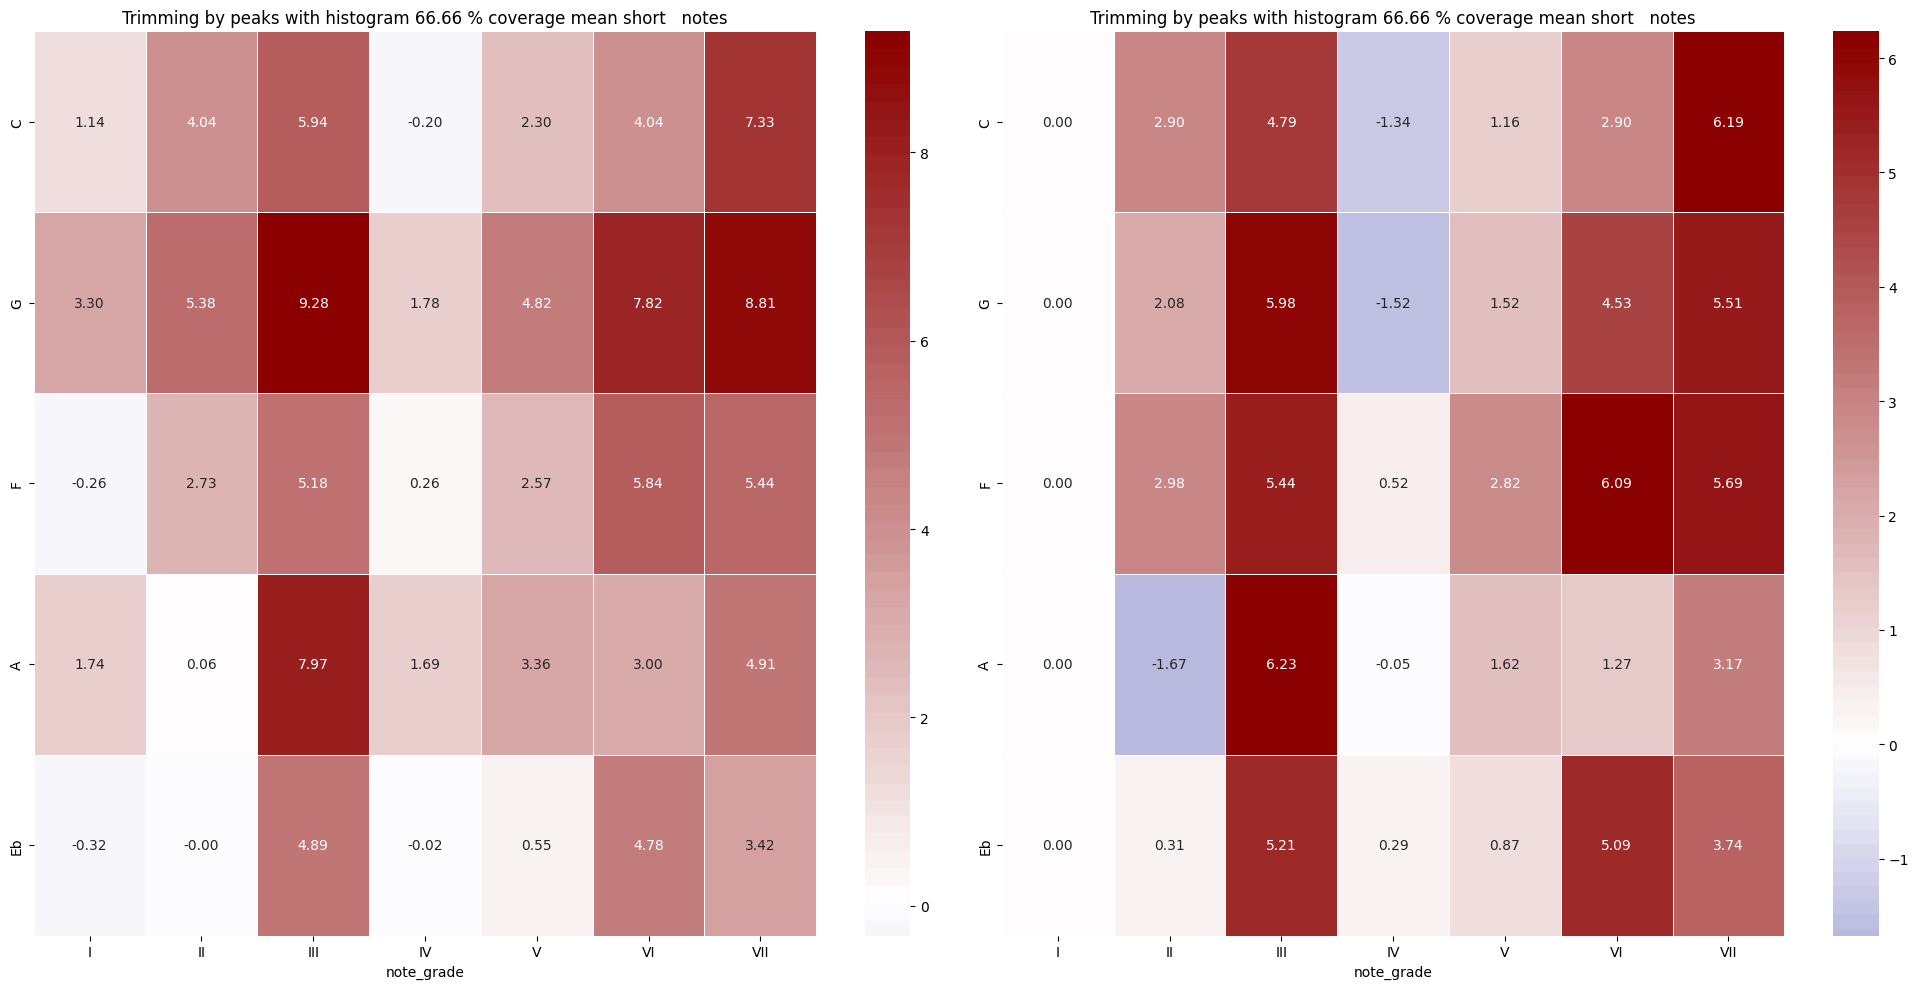

In [13]:
dict_functions.see_heatmap_zero_tonic(main_table, ' ', overall_coverage_mean)

### Standard Deviation Intonation values from 12-TET table

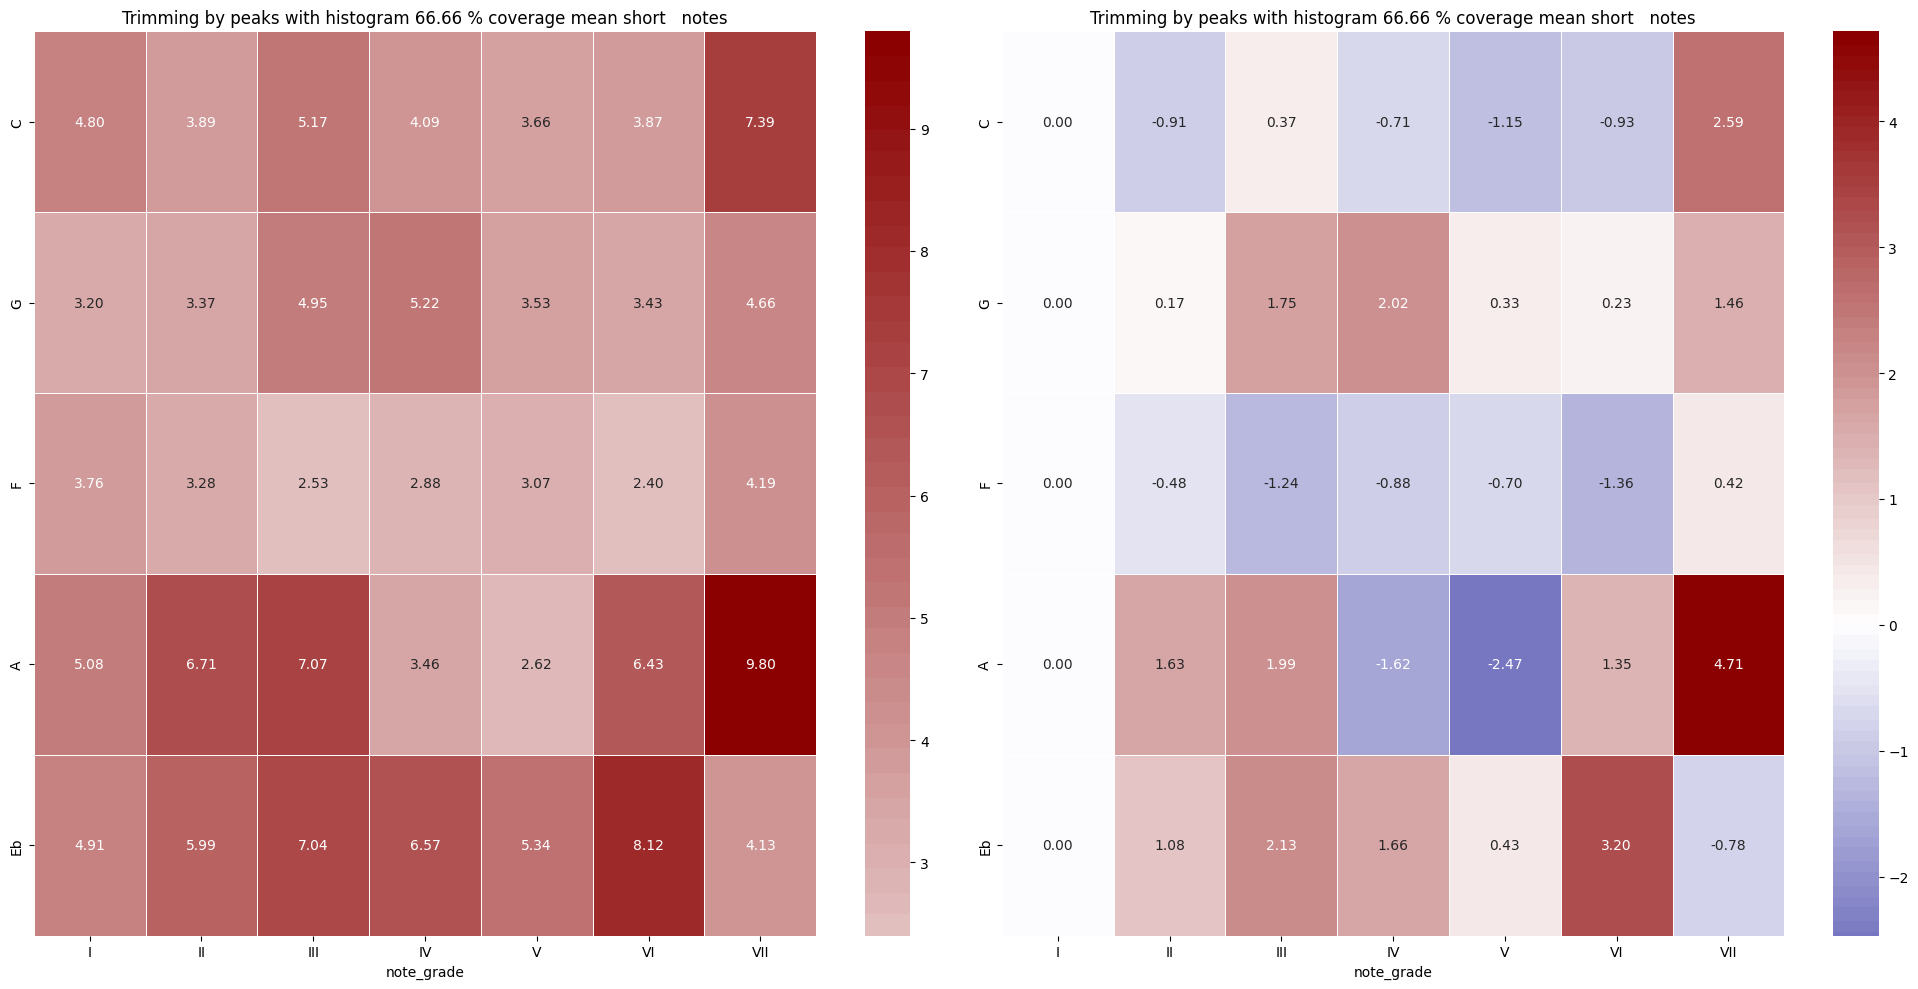

In [15]:
dict_functions.see_heatmap_zero_tonic(main_table_std, ' ', overall_coverage_mean)

## For long notes

In [16]:
long_main_pitch_value, long_stabilized_values, long_stabilized_time, long_coverage_dict, pshort_main_pitch_value = dict_functions.long_get_mean_pitch_value(long_final_notes, long_final_times)
long_overall_coverage_mean = dict_functions.get_overall_coverage(long_coverage_dict)

Overall mean: 95.43486473107119


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Number of violinists: 7 for Wohlfahrt-Op45-01
Number of violinists: 6 for Wohlfahrt-Op45-03
Number of violinists: 7 for Wohlfahrt-Op45-05
Number of violinists: 4 for Wohlfahrt-Op45-10
Number of violinists: 6 for Wohlfahrt-Op45-11
Number of violinists: 7 for Wohlfahrt-Op45-15
Number of violinists: 7 for Wohlfahrt-Op45-26


'grouped_df'

mean_per_row
tonality note_grade              
A        I               1.812116
C        I               3.587249
Eb       I               0.380581
F        I               1.017213
G        I               1.283988
         III             7.535428

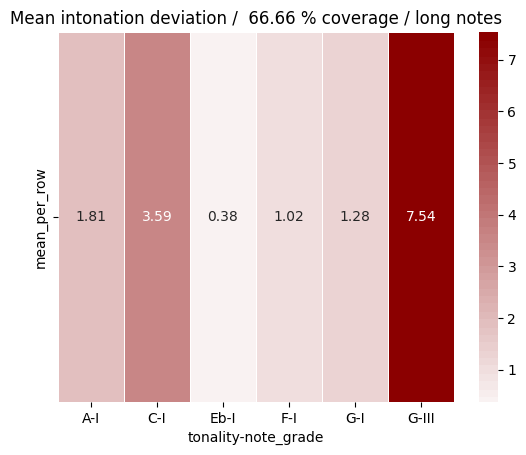

In [17]:
grouped_df, dict_df_value_count_players = dict_functions.long_see_main_int_tables(long_main_pitch_value, pdf_dict_long, overall_coverage_mean)